In [1]:
import numpy as np
import itertools as it
from  matplotlib import pyplot as plt
from math import prod
from tqdm import tqdm
from matplotlib import rc,rcParams
rc('font', weight='bold')
rcParams['text.usetex'] = True

from Permutation import Permutation

### First Example

In [3]:
p = np.random.permutation(1000).astype(int)
perm = Permutation(p,(10,10,10))
layer_n, swaps =  perm.hypercube_sort()
print("number of layers = ",layer_n)
print("number of swaps = ", len(swaps))
print("lower bound for the number of layers = ",perm.give_minimal_layer_num())

number of layers =  49
number of swaps =  11363
lower bound for the number of layers =  26.0


## Simple histogram of layer and swaps numbers

In [4]:
def plot_hist_perms_time_random(cube_dimentions:tuple,perm_N:int):
    data_l_num = np.zeros(perm_N)
    data_swap_num = np.zeros(perm_N)
    data_path = np.zeros(perm_N)

    for i in tqdm(range(perm_N), total = perm_N,desc = "Percent of sorted permutations"):
        p = np.random.permutation(prod(cube_dimentions)).astype(int)
        perm = Permutation(p,cube_dimentions)
        data_l_num[i],swap_list = perm.hypercube_sort()
        data_swap_num[i] = len(swap_list)
        data_path[i] =  perm.give_minimal_layer_num()
    
    HIST_BINS = np.linspace(-0.5, np.max(data_swap_num)+0.5, int(np.max(data_swap_num))+2)

    fig, ax = plt.subplots()
    _, _, bar_container = ax.hist(data_swap_num, HIST_BINS, lw=1, fc="blue")
    plt.title(f"Number of steps to implement permutation in hypercube of size {cube_dimentions}")
    plt.show()
    
    HIST_BINS = np.linspace(-0.5, np.max(data_l_num)+0.5, int(np.max(data_l_num))+2)
    
    fig, ax = plt.subplots()
    _, _, bar_container = ax.hist(data_l_num, HIST_BINS, lw=1, ec="yellow", fc="blue", alpha=0.3,label='layer number')
    _, _, bar_container = ax.hist(data_path, HIST_BINS, lw=1, ec="yellow", fc="green", alpha=0.3,label='longest path')

    plt.title(f"Number of layers to implement permutation in hypercube of size {cube_dimentions}")
    plt.legend(loc='upper left')
    plt.show()
    
    
    print("average number of swaps = ", np.mean(data_swap_num))
    print("average number of layers = ", np.mean(data_l_num))
    print("average longest path = ", np.mean(data_path))

Percent of sorted permutations: 100%|████████████████████████████████████████████| 10000/10000 [02:52<00:00, 58.03it/s]


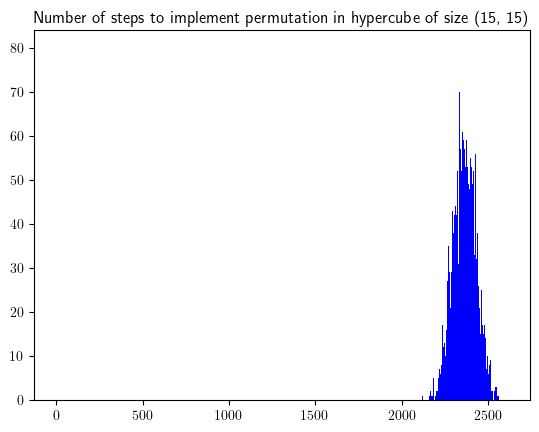

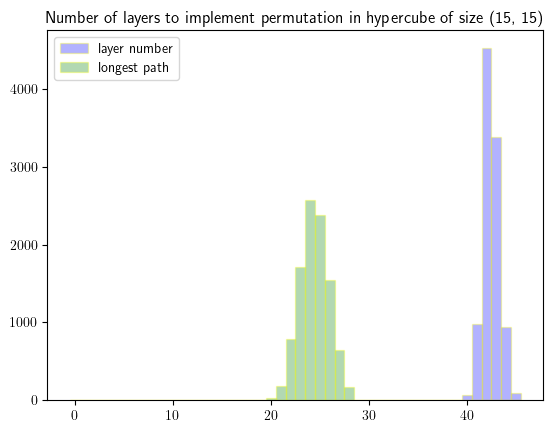

average number of swaps =  2362.0497
average number of layers =  42.4403
average longest path =  24.4183


In [5]:
plot_hist_perms_time_random((15,15),10000)